In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [389]:
df=pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [390]:
print(df.isna().sum())

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [391]:
'''Select the features 'ENGINESIZE', 'CYLINDERS', 
'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the 
model. Plot Emission values with respect to Engine size.
'''

df_1=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

df_1.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


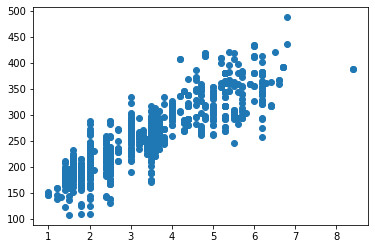

In [392]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
plt.show()

In [393]:
''' split the data into training and test sets (70:30) to create a model using training 
set, evaluate the model using test set, and use model to predict unknown value.'''


x=df_1.drop(columns='CO2EMISSIONS',axis=1).values
y=df_1['CO2EMISSIONS'].values

# print(y_train.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# print(x_train.shape)
# print(y_train.shape)
lm3 = LinearRegression()
lm3.fit(x_train,y_train)

y_predicted3=lm3.predict(x_test)

print("R2 score: %.2f" % r2_score(y_test,y_predicted3))


''' Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify 
the accuracy by calculating Mean absolute error, Residual sum of squares, R2-
score and comment on which model is the best.'''


poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x_train)
poly_features_test = poly.fit_transform(x_test)
# print(poly_features.shape)
lm = LinearRegression()
lm.fit(poly_features,y_train.T)

y_predicted=lm.predict(poly_features_test)
y_predicted



R2 score: 0.87


array([267.67547869, 202.1235495 , 199.91380744, 162.74462973,
       320.45540217, 195.8072331 , 165.67566375, 192.32390602,
       230.23486853, 189.77555906, 230.59019473, 271.71985268,
       197.2622827 , 416.87967453, 195.78279614, 173.23981984,
       197.88341403, 331.20930271, 267.75821042, 227.78482869,
       383.82537269, 228.26469009, 254.45631016, 264.04947379,
       283.34113793, 240.70235745, 147.78398319, 226.88523356,
       182.65287679, 241.24649974, 218.28134152, 424.53392004,
       242.33022964, 355.50124886, 295.11626095, 320.07299538,
       375.93005949, 170.02118203, 356.54790891, 264.26853933,
       240.70235745, 345.65684562, 226.7528926 , 260.4897335 ,
       257.94422154, 205.72629158, 193.98107767, 108.19004793,
       153.53345356, 251.52663088, 187.27352115, 349.13285089,
       298.91863262, 365.19691296, 221.69869142, 275.17745523,
       213.98356156, 264.20816572, 268.34296118, 177.80707853,
       216.27662578, 256.57009372, 218.89877653, 191.36

In [394]:
print("Mean absolute error for degree 3: %.2f" %mean_absolute_error(y_test,y_predicted))
print("Residual sum of squares for degree 3: %.2f"
  % ((y_predicted - y_test) ** 2).sum())
print("R2 score for degree 3: %.2f" % r2_score(y_test,y_predicted))

Mean absolute error for degree 3: 10.97
Residual sum of squares for degree 3: 102524.45
R2 score for degree 3: 0.92


In [395]:
poly1 = PolynomialFeatures(degree=4, include_bias=False)
poly_features1 = poly1.fit_transform(x_train)
poly_features_test1 = poly1.fit_transform(x_test)
# print(poly_features1.shape)
lm1 = LinearRegression()
lm1.fit(poly_features1,y_train.T)

y_predicted1=lm1.predict(poly_features_test1)
y_predicted1

array([274.02562261, 206.72724439, 196.14671855, 166.37764236,
       322.30403827, 195.7780419 , 168.31332888, 189.1756948 ,
       228.72537742, 183.67928374, 231.05425396, 278.61786361,
       191.27619111, 416.37686683, 187.32640282, 164.17786122,
       196.76061835, 342.64535033, 269.42877201, 227.22735389,
       422.45072633, 227.80499681, 251.51709804, 265.00666959,
       286.09786191, 240.78375891, 153.86925403, 267.11662407,
       179.79303231, 258.01717276, 216.0655805 , 427.07165127,
       239.72995742, 359.80679659, 281.09597574, 315.76164199,
       385.70301062, 166.76859239, 362.25526676, 266.76645495,
       240.78375891, 376.50359121, 227.75445679, 259.94607906,
       255.84663966, 201.99707795, 194.72738784, 118.78739401,
       160.70690799, 250.96444902, 184.6012067 , 353.64063979,
       289.51213994, 371.13092533, 220.64670774, 277.72955758,
       208.84306102, 263.63401988, 269.10640467, 175.03005745,
       212.60970329, 277.60478991, 217.0248404 , 188.21

In [396]:
print("Mean absolute error for degree 4: %.2f" %mean_absolute_error(y_test,y_predicted1))
print("Residual sum of squares for degree 4: %.2f"
  % ((y_predicted1 - y_test) ** 2).sum())
print("R2 score for degree 4: %.2f" % r2_score(y_test,y_predicted1))

Mean absolute error for degree 4: 8.96
Residual sum of squares for degree 4: 94716.59
R2 score for degree 4: 0.93


In [397]:
poly2 = PolynomialFeatures(degree=5, include_bias=False)
poly_features2 = poly2.fit_transform(x_train)
poly_features_test2 = poly2.fit_transform(x_test)
# print(poly_features2.shape)
lm2 = LinearRegression()
lm2.fit(poly_features2,y_train.T)

y_predicted2=lm2.predict(poly_features_test2)
y_predicted2

array([ 277.23643064,  201.69480879,  198.82031826,  165.60571441,
        318.02697498,  213.50932769,  167.76054375,  190.17523743,
        227.3491635 ,  185.89253077,  230.11414195,  283.94390111,
        193.07748351,  401.75847461,  186.43025699,  164.67445617,
        197.51107965,  346.10794596,  270.24541309,  226.43890256,
        414.23293818,  223.74051741,  249.56571028,  265.80734841,
        284.59801702,  237.88203947,  155.26879335,  235.22722531,
        179.71338429,  257.36376311,  218.95191502,  408.21576026,
        236.6702873 ,  344.17128176,  276.46667596,  324.26969452,
        388.21713559,  165.13253688,  426.99100849,  266.28323005,
        237.88203947,  341.94526092,  227.77559983,  260.9773372 ,
        255.56287385,  204.81828649,  194.83355184,  104.8567732 ,
        159.49830618,  249.84939273,  185.2723649 ,  360.22720215,
        279.65915041,  368.47062811,  221.90723937,  281.20393221,
        206.45498097,  263.56677702,  272.34731573,  173.86160

In [398]:
print("Mean absolute error for degree 5: %.2f" %mean_absolute_error(y_test,y_predicted2))
print("Residual sum of squares for degree 5: %.2f"
  % ((y_predicted2 - y_test) ** 2).sum())
print("R2 score for degree 5: %.2f" % r2_score(y_test,y_predicted2))

Mean absolute error for degree 5: 11.28
Residual sum of squares for degree 5: 1300851.99
R2 score for degree 5: 0.05
